In [1]:
import sys, os
sys.path.append(os.path.abspath('../'))
sys.path.append(os.path.abspath('../modules/'))
import healpy as h
from flat_sky_codes import flat_sky_analysis as fsa
from masking import gen_masks as gm
from astropy.io import fits
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


# Tests on simulations

In [5]:
npix=512
reso=1.5

def return_center_mask(radius=50.):
	mask=np.zeros((npix,npix),float)
	distance=np.zeros((npix,npix),float)
	y,x=np.indices((distance.shape))
	xc=np.int(npix/2) ; yc=xc
	distance=np.sqrt((x-xc)**2. +(y-yc)**2.)*reso
	maxnpix=2*int(radius/reso)
	cpix=int(npix/2.)
	mask[distance<=radius]=1.
	return mask

def return_edge_apodized_mask(edge_width=17.,fwhm=20.):
	mask=np.ones((npix,npix),float)
	epix=np.int(np.ceil(edge_width/reso))
	mask[:epix,:]=0 ; mask[npix-epix:,:]=0
	mask[:,:epix]=0 ; mask[:,npix-epix:]=0
	ell,bl=fsa.get_gauss_beam(fwhm,20000)
	mask=fsa.filter_map(mask,reso,bl,ell)
	return mask

def return_ps_filled_data(data,mask,pixel_size):
    npix=data.shape[0]
    
    ellstep=arange(500,6500,500)
    bl=np.ones(6000,float) ; elld=arange(np.size(bl))
    
    fdata=np.zeros_like(data)
    for lmax in ellstep:
        bl=np.ones(6000,float)
        bl[elld>lmax]=0.
        lpfiltr=fsa.get_fourier_filter(cl=bl,ell=elld,nxpix=npix,pixel_size=pixel_size)
        imp=1. ; diff=1.
        
        iterations=0
        while diff>1e-4 and iterations<20:
            ofdata=data+fdata*(1-mask)
            fdatalm=fsa.map2alm(ofdata,pixel_size=pixel_size)
            fdata=fsa.alm2map(fdatalm*lpfiltr,pixel_size=pixel_size)
            temp=np.sum(((fdata-ofdata).ravel())**2.)
            diff = abs(imp-temp)/imp
            imp=temp
            iterations=iterations+1
            
    return fdata

In [6]:
cl=h.read_cl("../../../../../../Data/Planck/spectra/planck_wp_highL_lensing_param.fits")[0]
ell=arange(np.size(cl))
mask=1.-return_center_mask()
data=fsa.gensim(cl,npix,reso)*mask
osimalm=fsa.map2alm(osim,pixel_size=reso)
datalm=fsa.map2alm(data*mask,pixel_size=reso)
elld,cldd=fsa.alm2cl(alm=datalm,almp=datalm,pixel_size=reso)

In [8]:
fdata=return_ps_filled_data(data,mask,reso)

<IPython.core.display.Javascript object>


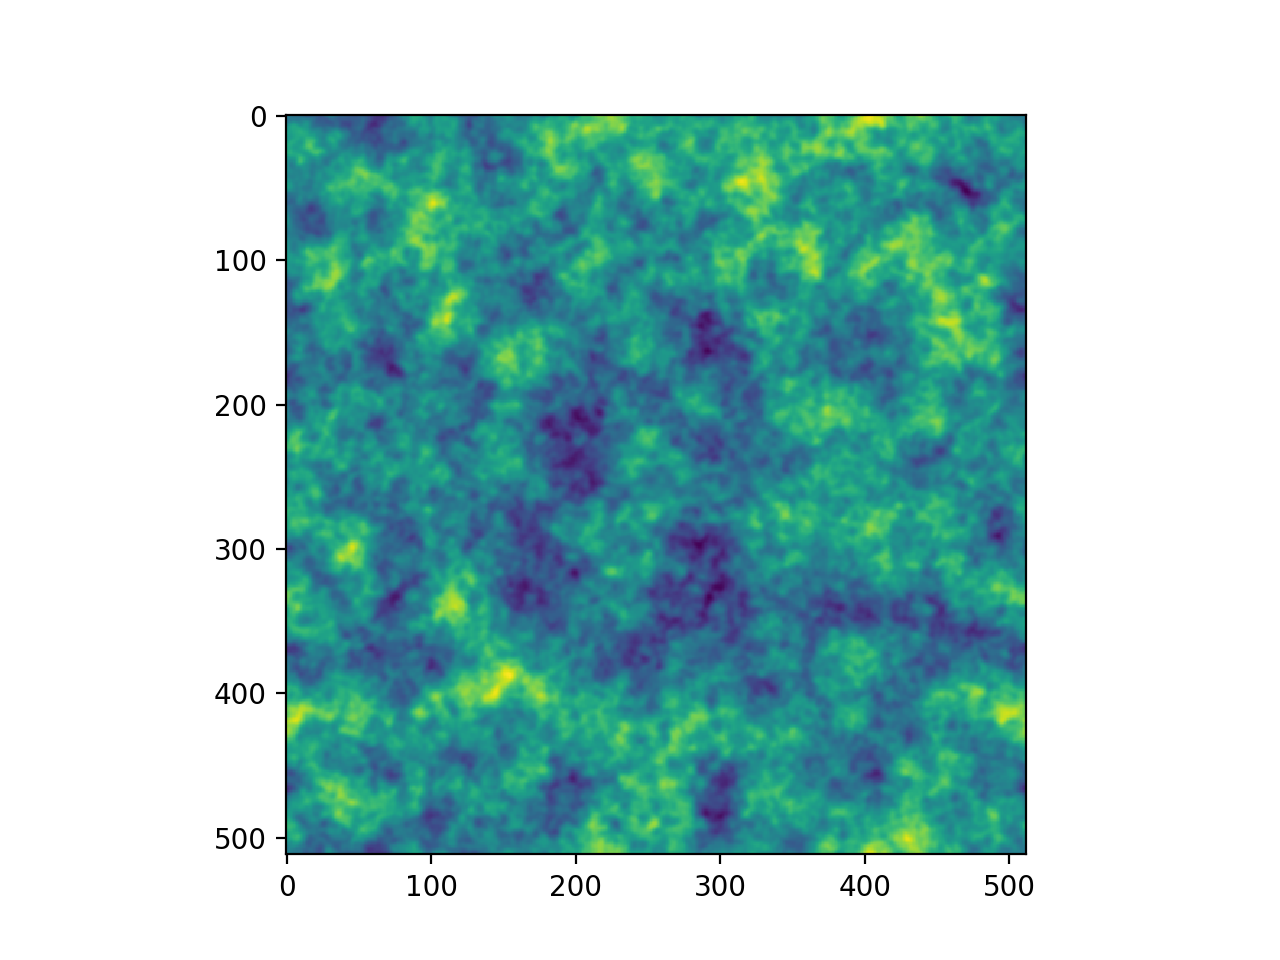

<IPython.core.display.Javascript object>


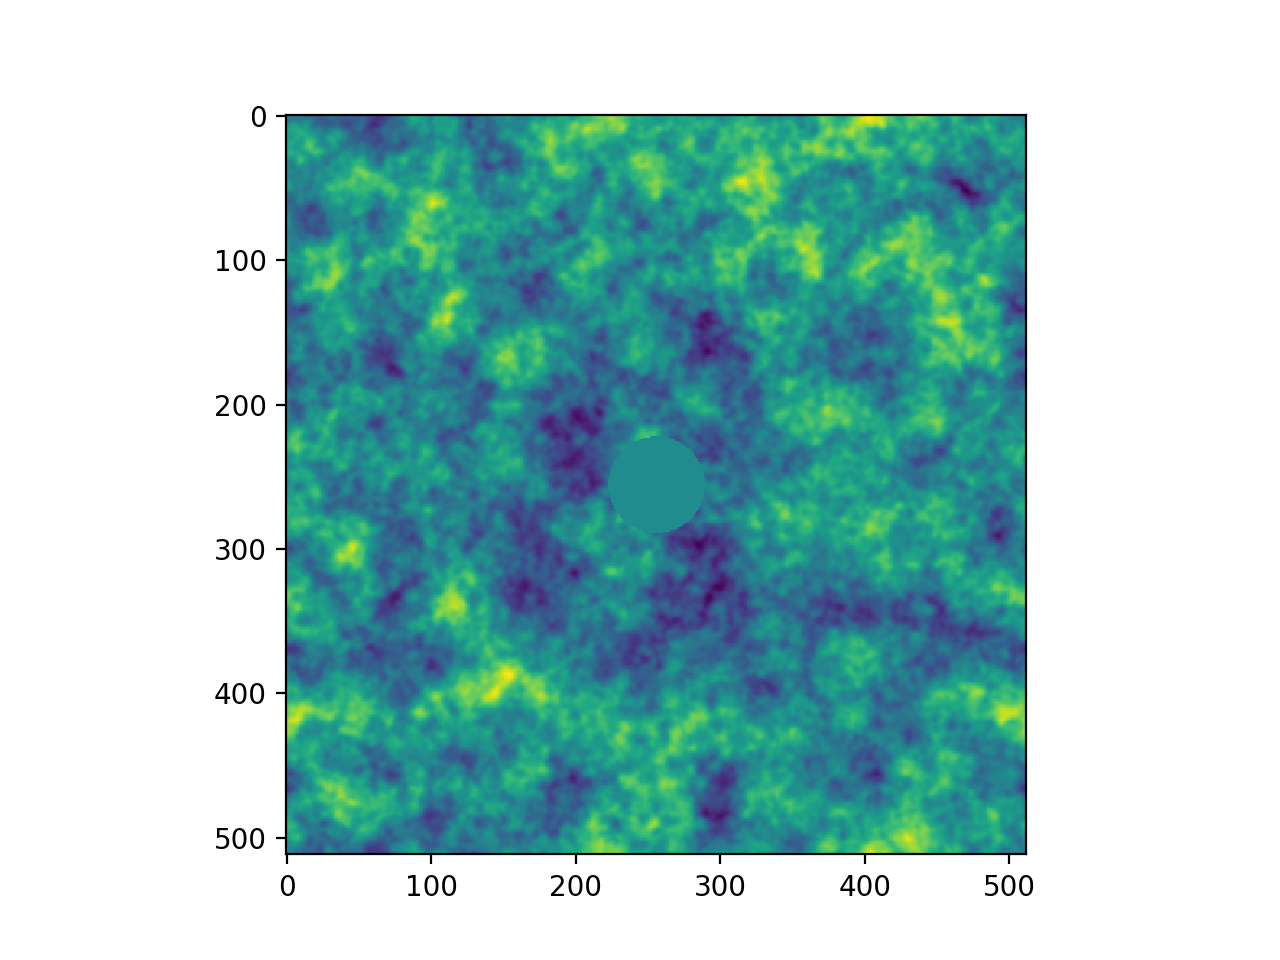

In [10]:
figure()
imshow(fdata)

figure()
imshow(data)

In [48]:
# bl=np.ones(10000,float)
# elld=arange(np.size(bl))
# bl[elld>4000]=0.
# lpfiltr=fsa.get_fourier_filter(cl=bl,ell=elld,nxpix=npix,pixel_size=reso)

# figure()
# imshow(lpfiltr)

<IPython.core.display.Javascript object>


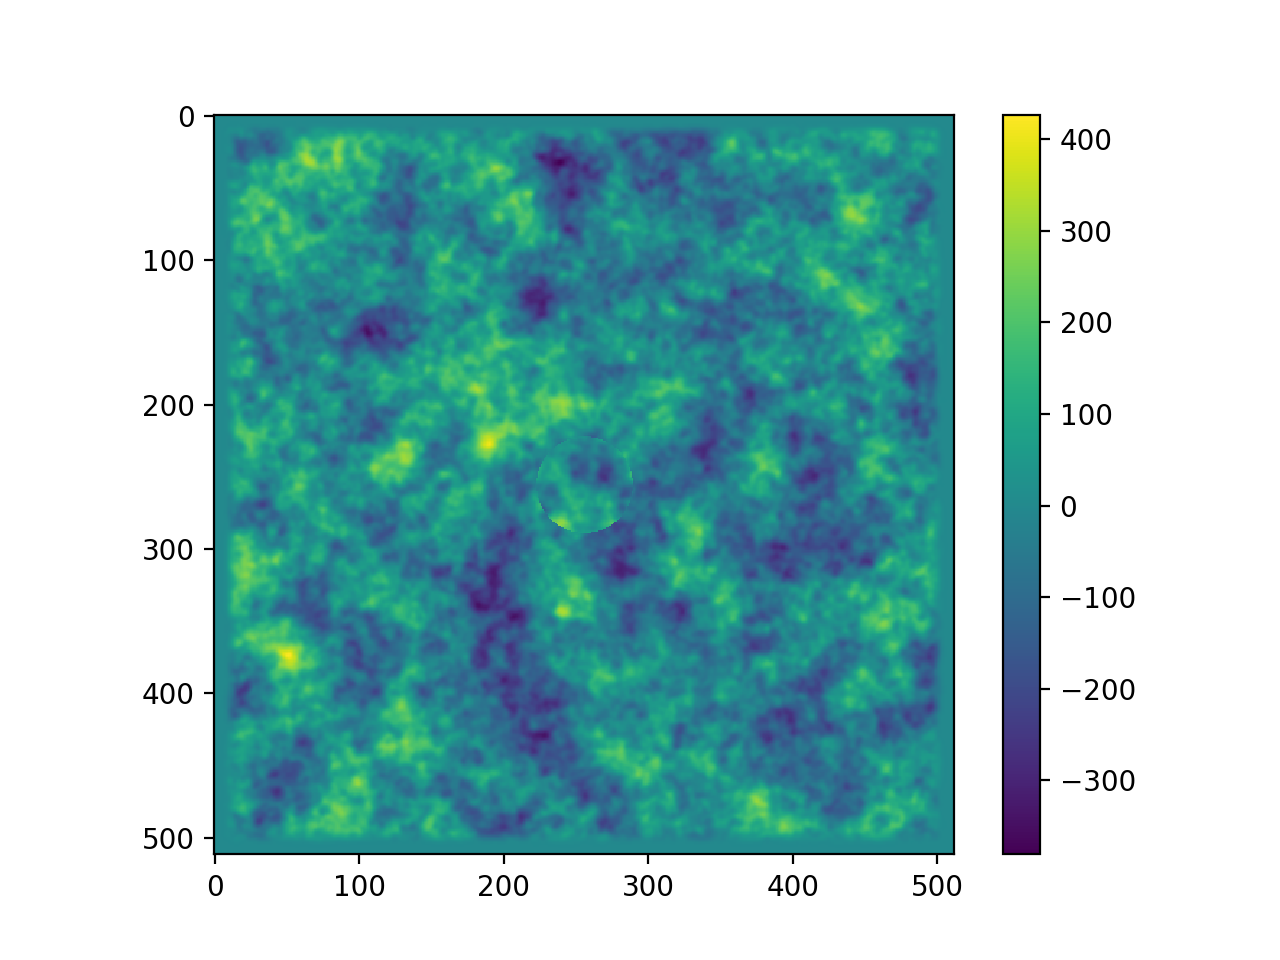

<IPython.core.display.Javascript object>


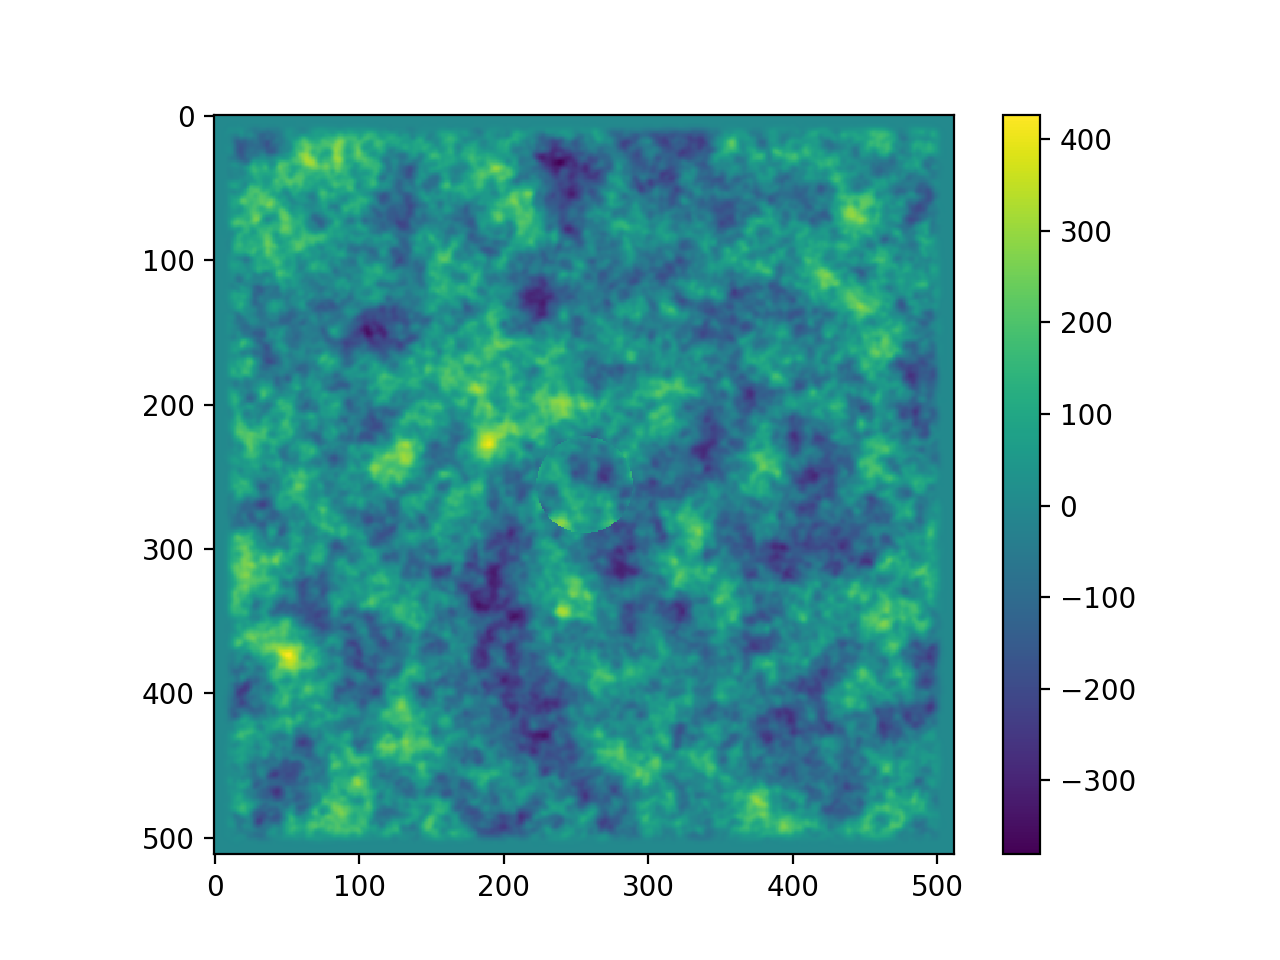

<IPython.core.display.Javascript object>


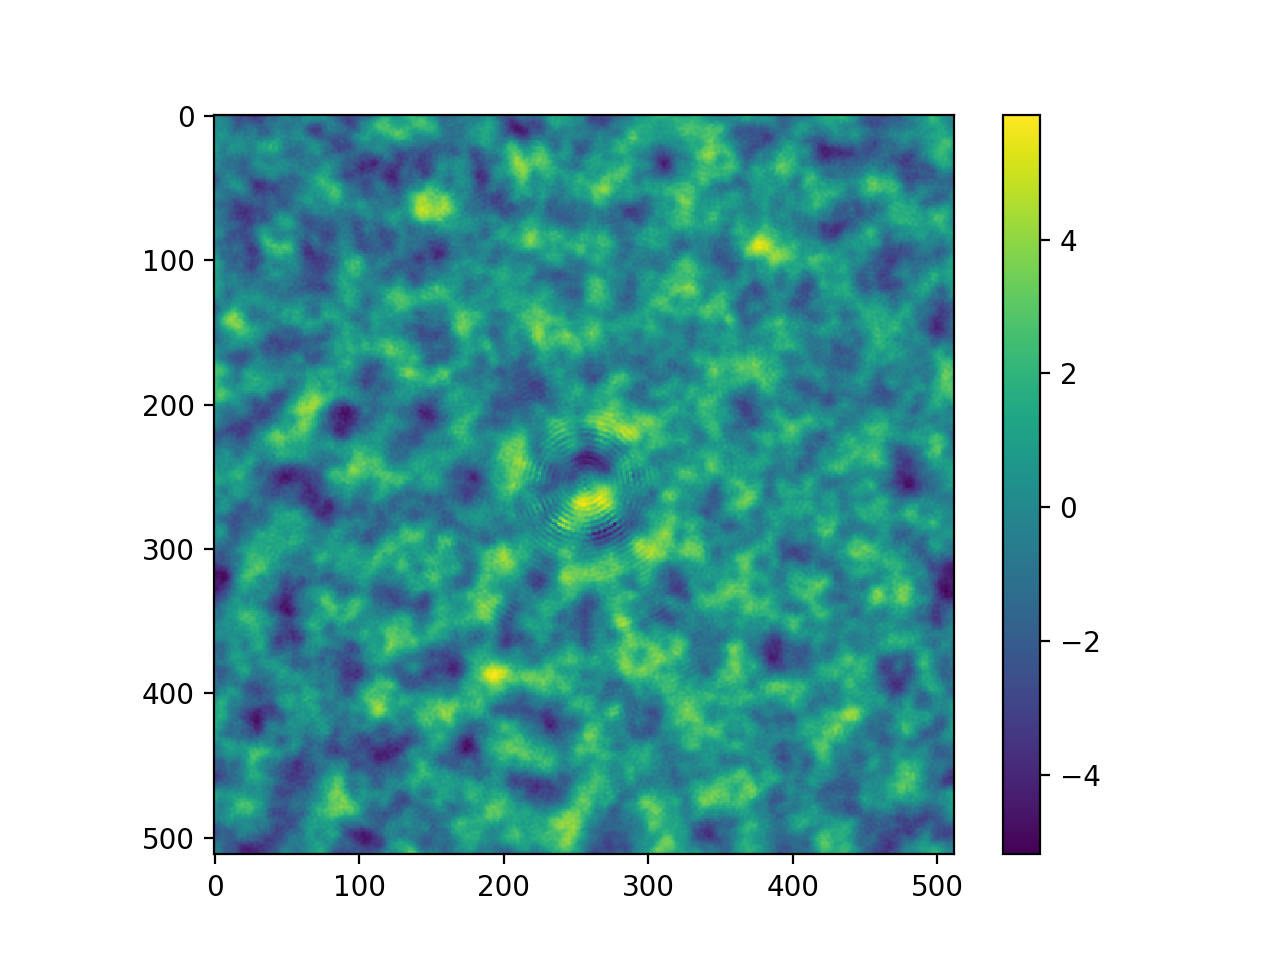

In [50]:
for i in range(50):
    elld,clds=fsa.alm2cl(alm=datalm,almp=fsa.map2alm(sim*(1-mask),pixel_size=reso),pixel_size=reso)
    filtr=fsa.get_fourier_filter(cl=clds/cldd,ell=elld,nxpix=npix,pixel_size=reso)
    calm=lpfiltr*filtr*fsa.map2alm((data-osim)*mask,pixel_size=reso)
    simalm=osimalm+calm
    sim=fsa.alm2map(simalm,pixel_size=reso)
    fdata=sim*(1-mask)+data
    fdatalm=fsa.map2alm(fdata,pixel_size=reso)
    elld,cldd=fsa.alm2cl(alm=fdatalm,almp=datalm,pixel_size=reso)

figure()
imshow(sim*(1-mask)+data)
colorbar()

figure()
imshow(osim*(1-mask)+data)
colorbar()

figure()
imshow(sim-osim)
colorbar()

In [73]:
filename="../../tempdata/planck_pr3/planck_cosmo_cat/10deg_patches/tangent_planes/cluster_G195.8-24.33.fits"
f1=fits.open(filename)
data=f1[2].data[3,]
mask=f1[3].data
data=data*mask

npix=data.shape[0]
reso=1.77
datalm=fsa.map2alm(data,pixel_size=reso)

figure()
imshow(data)

<IPython.core.display.Javascript object>


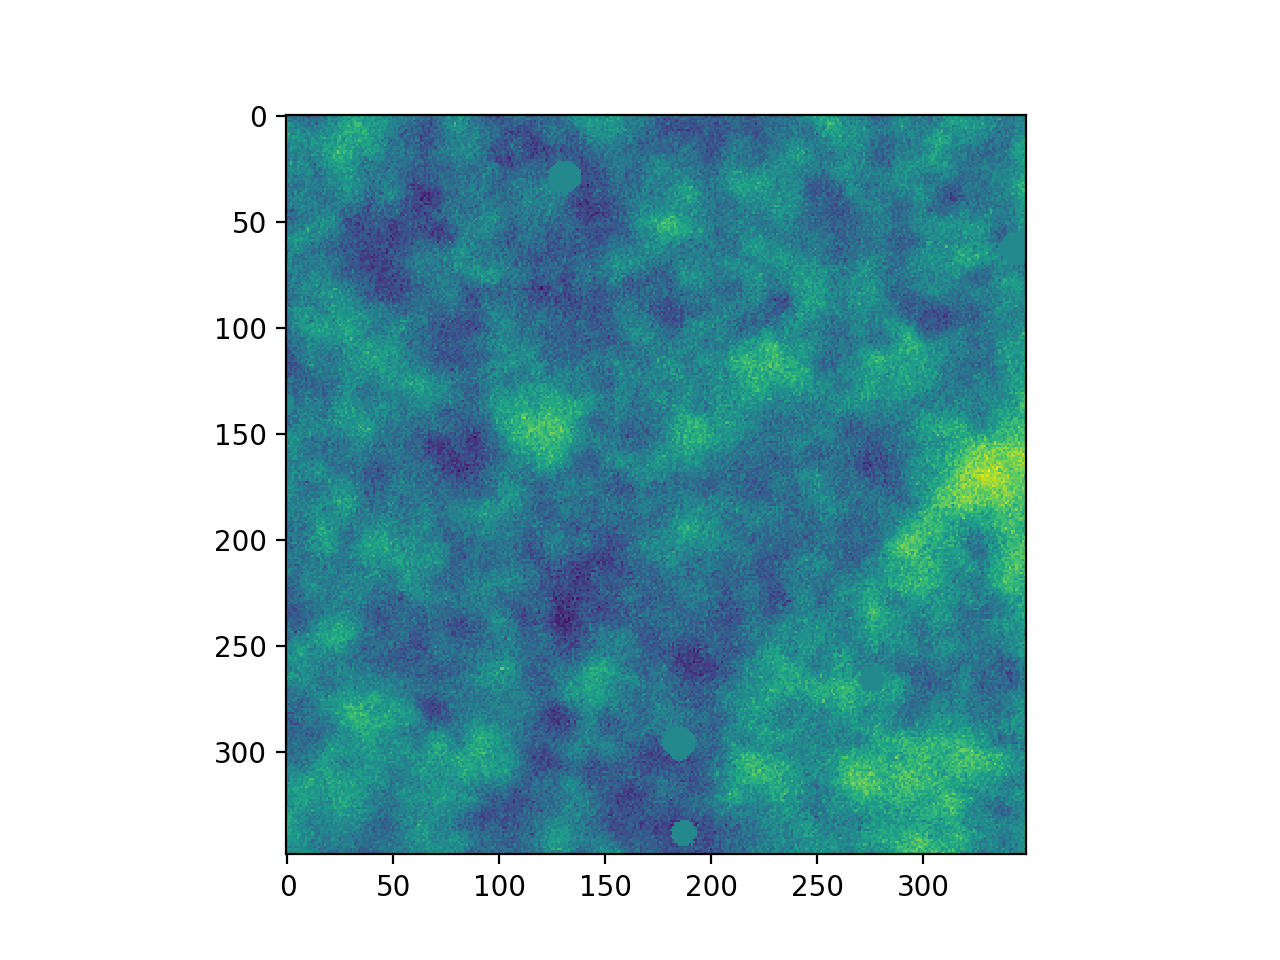

# Bojkava

In [216]:
cl=h.read_cl("../../../../../../Data/Planck/spectra/planck_wp_highL_lensing_param.fits")[0]
ell=arange(np.size(cl))
mask=1.-return_center_mask()
emask=return_edge_apodized_mask(fwhm=10.)
data=fsa.gensim(cl,npix,reso)*mask
dataalm=fsa.map2alm(data,pixel_size=reso)
bl=np.ones(10000,float)

bl[elld>1000]=0.
lpfiltr=fsa.get_fourier_filter(cl=bl,ell=elld,nxpix=npix,pixel_size=reso)

# figure()
# imshow(lpfiltr)

<IPython.core.display.Javascript object>


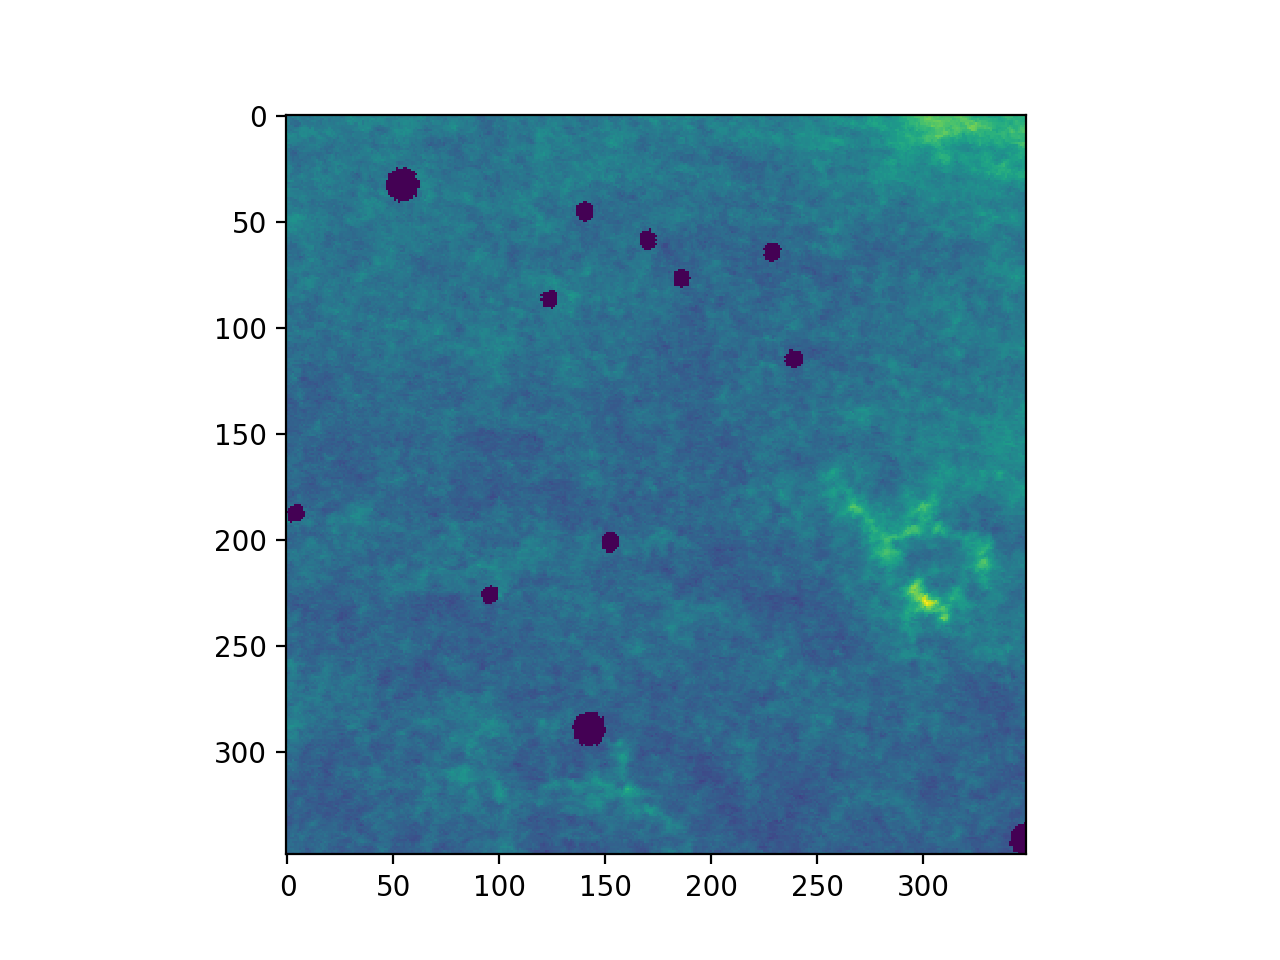

In [94]:
filename="../../tempdata/planck_pr3/planck_cosmo_cat/10deg_patches/tangent_planes/cluster_G166.08+43.38.fits"
f1=fits.open(filename)
data=f1[2].data[7,]
mask=f1[3].data
data=data*mask

npix=data.shape[0]
reso=1.77
datalm=fsa.map2alm(data,pixel_size=reso)

figure()
imshow(data)

In [96]:
ellstep

array([ 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500,
       6000])

In [97]:
ellstep=arange(500,6500,500)
fdata=np.zeros_like(data)
bl=np.ones(6000,float)
elld=arange(np.size(bl))
for lmax in ellstep:
    bl=np.ones(6000,float)
    bl[elld>lmax]=0.
    lpfiltr=fsa.get_fourier_filter(cl=bl,ell=elld,nxpix=npix,pixel_size=reso)
    imp=1. ; diff=1.
    #for i in range(20):
    iterations=0
    while diff>1e-4 and iterations<20:
        ofdata=data+fdata*(1-mask)
        fdatalm=fsa.map2alm(ofdata,pixel_size=reso)
        smdata=fsa.alm2map(datalm*lpfiltr,pixel_size=reso)
        fdata=fsa.alm2map(fdatalm*lpfiltr,pixel_size=reso)
        temp=np.sum(((fdata-ofdata).ravel())**2.)
        diff = abs(imp-temp)/imp
        imp=temp
        iterations=iterations+1
        #print lmax,iterations,diff
 

500 1 0.843433271877
500 2 0.295681327517
500 3 0.0524187764247
500 4 0.013857294263
500 5 0.00512828393154
500 6 0.00209521599169
500 7 0.000876343554982
500 8 0.000369522195968
500 9 0.00015684774558
500 10 6.71594182379e-05
1000 1 0.935713095507
1000 2 0.00260172926854
1000 3 0.000394793361759
1000 4 0.000161635498558
1000 5 8.56492188859e-05
1500 1 0.955990851606
1500 2 0.00158766908765
1500 3 0.000409828636987
1500 4 0.000191430211837
1500 5 0.000107950837311
1500 6 6.90644315161e-05
2000 1 0.967093942416
2000 2 0.0016586013383
2000 3 0.00041427162368
2000 4 0.000179200560242
2000 5 9.92608262388e-05
2500 1 0.973890606793
2500 2 0.0013852674423
2500 3 0.000366951880465
2500 4 0.000177592208967
2500 5 0.000111266969434
2500 6 7.95878373672e-05
3000 1 0.978513241213
3000 2 0.000900319578893
3000 3 0.000300134593209
3000 4 0.000169688323002
3000 5 0.00011380382363
3000 6 8.29678966643e-05
3500 1 0.982023255799
3500 2 0.000842209284394
3500 3 0.00030174789187
3500 4 0.00018044810417
3

<IPython.core.display.Javascript object>


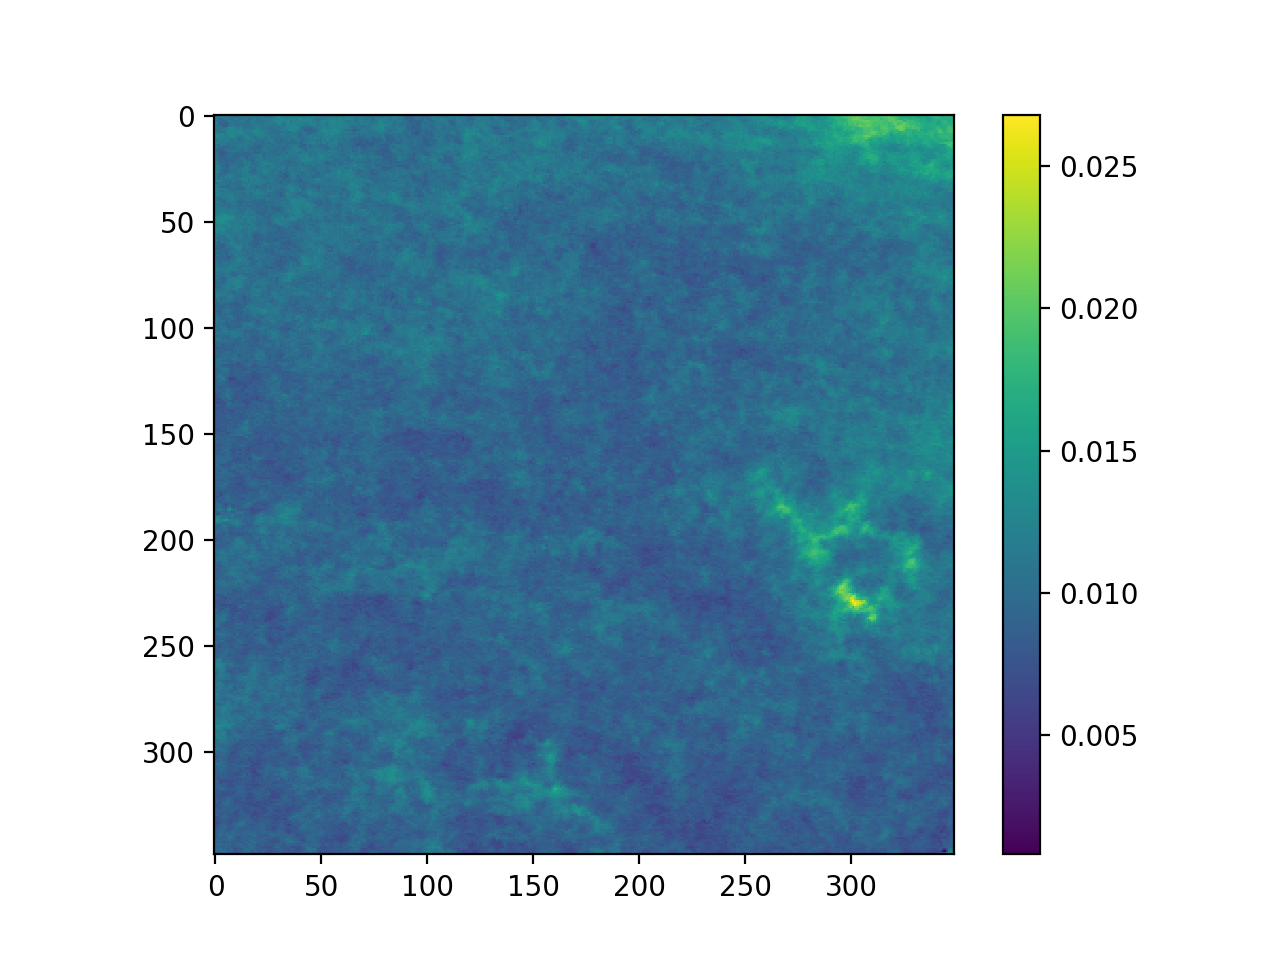

<IPython.core.display.Javascript object>


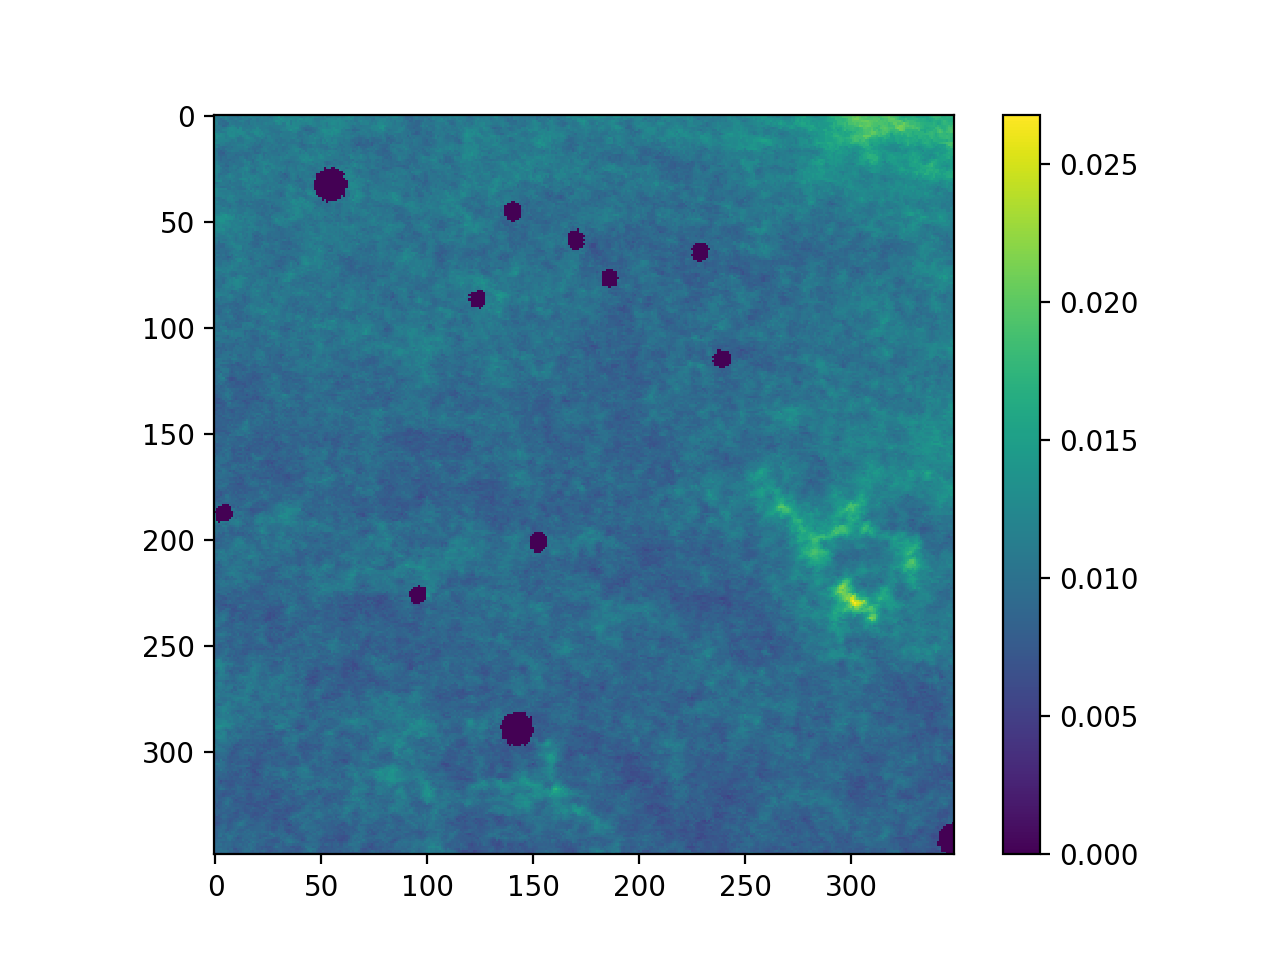

In [98]:
figure()
imshow(fdata)
colorbar()

figure()
imshow(data)
colorbar()

In [99]:
elld,clfdata=fsa.map2cl(fdata,pixel_size=reso)
elld,cldata=fsa.map2cl(data,pixel_size=reso)

<IPython.core.display.Javascript object>


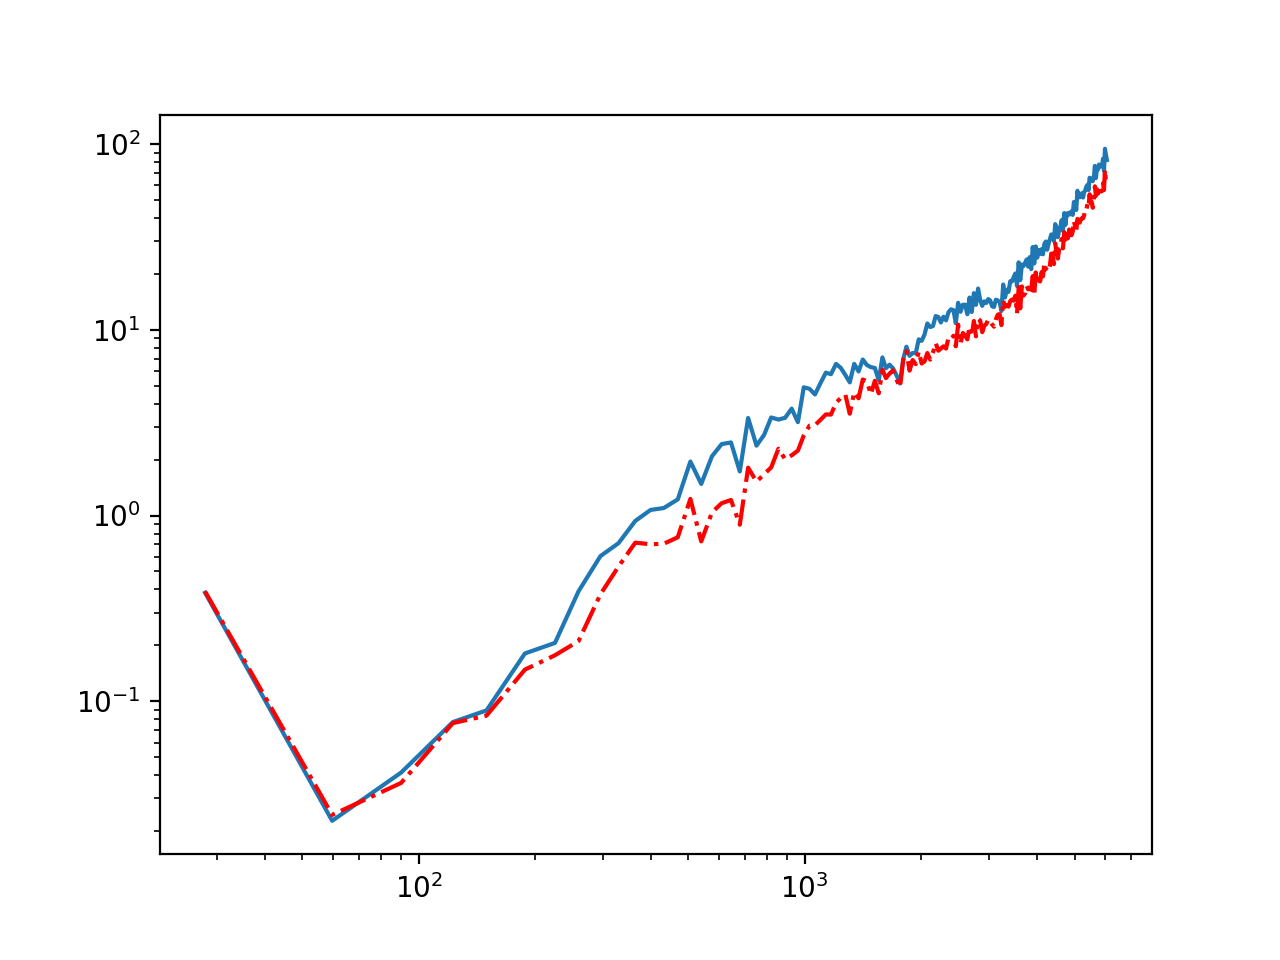

[]

In [101]:
figure()
plot(elld,elld**4*cldata)
plot(elld,elld**4*clfdata,"r-.")
loglog()

In [134]:
T1idx=np.where(mask.ravel()==0)[0]

In [187]:
bmask=1.-return_center_mask(80)

In [188]:
T2idx=np.where(bmask.ravel()==0)[0]

In [189]:
T2idx=np.array([idx for idx in T2idx if idx not in T1idx])

In [190]:
C=np.transpose(np.matrix(data.ravel()[T2idx]))*np.matrix(data.ravel()[T2idx])

In [191]:
b=np.transpose(np.matrix(sim.ravel()[T1idx]))*np.matrix(data.ravel()[T2idx])

In [197]:
diffd=np.transpose(np.matrix(data.ravel()[T2idx]-sim.ravel()[T2idx]))

In [ ]:
filldata=np.array((b*np.linalg.pinv(C,rcond=1e-6)*diffd)).flatten()

In [ ]:
tsim=sim.ravel()
tsim[T1idx]=tsim[T1idx] + filldata

In [ ]:
tsim=tsim.reshape(npix,npix)

In [ ]:
figure()
imshow(tsim+data)
colorbar()

In [ ]:
np.linalg.